# How has aid to towns changed over time?

We can define town aid revenue many different ways, so we took two approaches. 

First we used all state and federal payments to towns, regardless of whether it was for schools or not. This would include all education grants, but also money that isn't for schools. The reasoning for this is that a large chunk of this money goes to schools, and money is money at the end of the day, so aid to one line item can free up resources for another.

Second, we used specific grant spending for Education Equalization and an ARRA stabilization grant that bouyed that grant in 2010 and 2011. This way is much more targeted and excludes a lot of other grants, but it's the bulk of education-specific spending, and it's more stable than other types of grants, like construction, which can fluctuate a lot.

In [2]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

# Part 1: How has aid changed over time?

### 1.1: Intergov rev, unadjusted

This part looks at all aid, or "intergovernmental revenue," regardless of whether it's for education.

In [26]:
fisc_df = pd.read_csv("output/1_fiscal.csv")

# Drop Groton City because the Fiscal Indicators reports do the same 
# Those are here: https://www.ct.gov/opm/cwp/view.asp?A=2984&Q=383170
# These data come from the databases linked there, and this makes it possible
# to test my calculations against their statewide totals
fisc_df = fisc_df[fisc_df["City"] != "GROTON (City of)"]
print (len(fisc_df["City"].unique()))
fisc_df.head()

169


,City,report_year,Education spending,Inter_Gov_Rev,Enrollment
0,ANDOVER,2013,8562868.0,2930349.0,588.63
1,ANSONIA,2013,34124712.0,29957368.0,2628.64
2,ASHFORD,2013,11250309.0,4953913.0,642.80
3,AVON,2013,53396764.0,8450231.0,3472.15
4,BARKHAMSTED,2013,8852107.0,2215545.0,648.78


In [27]:
intergov_df = fisc_df.groupby("report_year").agg({
    "Inter_Gov_Rev":'sum',
})
intergov_df

,Inter_Gov_Rev
report_year,
2007,2.689554e+09
2008,4.237439e+09
2009,3.045746e+09
2010,2.860261e+09
2011,2.912219e+09
2012,3.233235e+09
2013,3.248049e+09
2014,3.358155e+09
2015,3.281546e+09


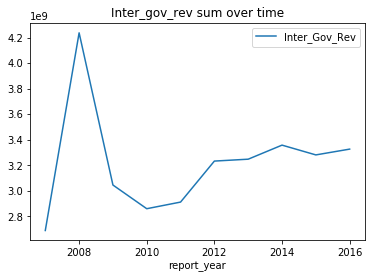

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
intergov_df.plot(title="Inter_gov_rev sum over time")
plt.gcf().savefig("figures/for-story/1.1 statewide-intergov-unadjusted.png")
#intergov_df.plot(title="Inter_gov_rev sum over time")

# Part 2: Intergov rev, adjusted

In [29]:
enrollment_df = fisc_df.groupby("report_year").agg({"Enrollment":'sum'}).round()
enrollment_df

,Enrollment
report_year,
2007,562684.0
2008,558048.0
2009,552783.0
2010,548313.0
2011,544179.0
2012,538197.0
2013,533198.0
2014,528428.0
2015,523185.0


In [30]:
intergov_adjusted_df = intergov_df.join(enrollment_df)
intergov_adjusted_df["adjusted_rev"] = intergov_adjusted_df["Inter_Gov_Rev"] / intergov_adjusted_df["Enrollment"]
intergov_adjusted_df

,Inter_Gov_Rev,Enrollment,adjusted_rev
report_year,,,
2007,2.689554e+09,562684.0,4779.865980
2008,4.237439e+09,558048.0,7593.323151
2009,3.045746e+09,552783.0,5509.840107
2010,2.860261e+09,548313.0,5216.475745
2011,2.912219e+09,544179.0,5351.583244
2012,3.233235e+09,538197.0,6007.531421
2013,3.248049e+09,533198.0,6091.638106
2014,3.358155e+09,528428.0,6354.990848
2015,3.281546e+09,523185.0,6272.248535


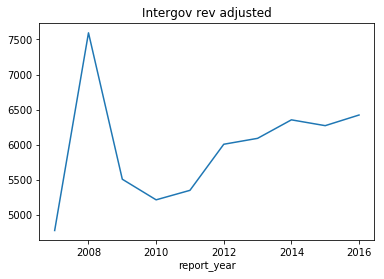

In [31]:
intergov_adjusted_df["adjusted_rev"].plot(title="Intergov rev adjusted")
plt.gcf().savefig("figures/for-story/1.2 statewide-intergov-adjusted.png")


# Part 3: Just Equalization and ARRA, unadjusted

In [32]:
grant_df = pd.read_csv("output/4_grant_spending.csv")
print ("How many cities are in here?")
len(grant_df["City"].unique())

How many cities are in here?


122

In [33]:
grants_by_year = grant_df.groupby("report_year").agg({"Payment":'sum'})
grants_by_year

,Payment
report_year,
2004,1454524550
2005,1492783524
2006,1546163605
2007,1553963572
2008,1712452116
2009,1788247613
2010,1796967608
2011,1800577456
2012,1801082863


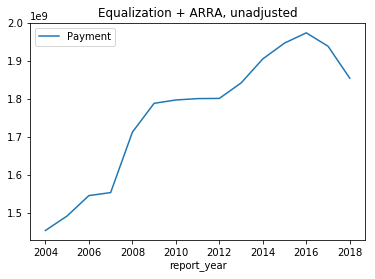

In [34]:
grants_by_year.plot(title="Equalization + ARRA, unadjusted")
plt.gcf().savefig("figures/for-story/1.3 statewide-ecs-arra-unadjusted.png")

In [35]:
grants_by_year_adjusted = grants_by_year.join(enrollment_df)
grants_by_year_adjusted

,Payment,Enrollment
report_year,,
2004,1454524550,NaN
2005,1492783524,NaN
2006,1546163605,NaN
2007,1553963572,562684.0
2008,1712452116,558048.0
2009,1788247613,552783.0
2010,1796967608,548313.0
2011,1800577456,544179.0
2012,1801082863,538197.0


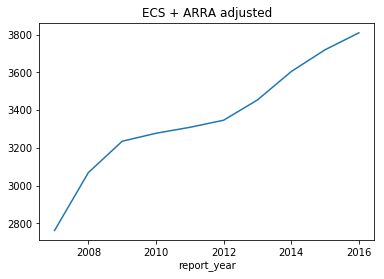

In [36]:
grants_by_year_adjusted["rev_adjusted"] = grants_by_year_adjusted["Payment"] / grants_by_year_adjusted["Enrollment"]
grants_by_year_adjusted["rev_adjusted"].plot(title="ECS + ARRA adjusted")
plt.gcf().savefig("figures/for-story/1.4 WRONG statewide-ecs-arra-adjusted for FISCIND ENROLLMENT.png")

# Use edsight enrollment instead

The above uses fiscal indicators enrollment which can be quite different form edsight enrollment

In [37]:
combined = pd.read_csv("output/5_combined.csv")
edsight_enrollment_df = combined.groupby("report_year").agg({"EDSIGHT_ENROLLMENT":'sum'})
grants_by_year_adjusted = grants_by_year_adjusted.join(edsight_enrollment_df)
grants_by_year_adjusted

,Payment,Enrollment,rev_adjusted,EDSIGHT_ENROLLMENT
report_year,,,,
2004,1454524550,NaN,NaN,0.0
2005,1492783524,NaN,NaN,0.0
2006,1546163605,NaN,NaN,0.0
2007,1553963572,562684.0,2761.698524,0.0
2008,1712452116,558048.0,3068.646633,516261.0
2009,1788247613,552783.0,3234.990246,510929.0
2010,1796967608,548313.0,3277.266102,506693.0
2011,1800577456,544179.0,3308.796289,502642.0
2012,1801082863,538197.0,3346.512268,495717.0


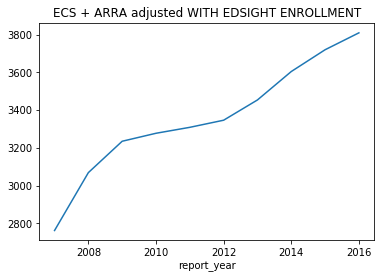

In [50]:
grants_by_year_adjusted["rev_adjusted_edsight"] = grants_by_year_adjusted["Payment"] / grants_by_year_adjusted["Enrollment"]
grants_by_year_adjusted["rev_adjusted_edsight"].plot(title="ECS + ARRA adjusted WITH EDSIGHT ENROLLMENT")

<module 'matplotlib.pyplot' from '/Users/jakekara/pandas/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

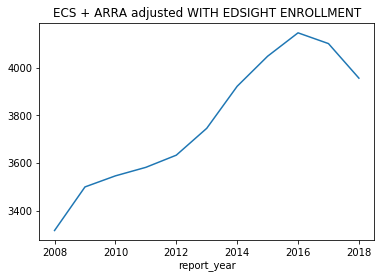

In [38]:
grants_by_year_adjusted["rev_adjusted_edsight"] = grants_by_year_adjusted["Payment"] / grants_by_year_adjusted["EDSIGHT_ENROLLMENT"]
grants_by_year_adjusted["rev_adjusted_edsight"].plot(title="ECS + ARRA adjusted WITH EDSIGHT ENROLLMENT")
plt.gcf().savefig("figures/for-story/1.4 ALT statewide-ecs-arra-adjusted-EDSIGHT.png")
plt

In [49]:
grants_by_year_adjusted

,Payment,Enrollment,rev_adjusted,EDSIGHT_ENROLLMENT,rev_adjusted_edsight
report_year,,,,,
2004,1454524550,NaN,NaN,0.0,inf
2005,1492783524,NaN,NaN,0.0,inf
2006,1546163605,NaN,NaN,0.0,inf
2007,1553963572,562684.0,2761.698524,0.0,inf
2008,1712452116,558048.0,3068.646633,516261.0,3317.027852
2009,1788247613,552783.0,3234.990246,510929.0,3499.992392
2010,1796967608,548313.0,3277.266102,506693.0,3546.462272
2011,1800577456,544179.0,3308.796289,502642.0,3582.226428
2012,1801082863,538197.0,3346.512268,495717.0,3633.288475


## Part 4, looking at district subgroups based on wealth rank

In [39]:
grant_df2 = pd.read_csv("output/5_combined.csv")
#grant_df2
grant_df2 = grant_df2[grant_df2["Grant Payments"].notnull()]
print ("How many cities are in here?")
len(
    grant_df2["City"].unique()
)

How many cities are in here?


122

In [40]:
def revenue_per_capita(min_rank=0, max_rank=1000, rev_col=None):

    if rev_col is None:
        rev_col = "Grant Payments"
    
    print ("REV_COL %s" % rev_col)
    
    ret = grant_df2[(grant_df2["wealth_rank"] >= min_rank) & (grant_df2["wealth_rank"] <= max_rank)].groupby(["report_year"]).agg({
        rev_col:'sum',
        "Enrollment":"sum"
    })
    ret = ret[ret["Enrollment"] > 0]
    ret["rev_per_student"] = ret[rev_col] / ret["Enrollment"]

    return ret

revenue_per_capita(0,10)#, rev_col="Inter_Gov_Rev")

REV_COL Grant Payments


,Enrollment,Grant Payments,rev_per_student
report_year,,,
2007,35915.59,8745104.0,243.490473
2008,35955.95,12899890.0,358.769272
2009,35933.05,13183061.0,366.878431
2010,35702.56,12905901.0,361.483910
2011,35802.01,13780360.0,384.904646
2012,35643.37,13364892.0,374.961515
2013,35572.29,13624236.0,383.001376
2014,35543.06,13667602.0,384.536447
2015,35360.61,13464412.0,380.774314


REV_COL Grant Payments


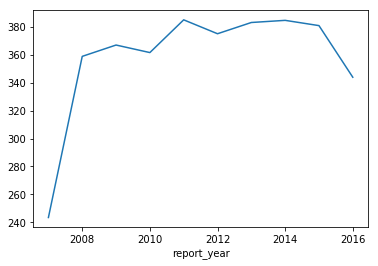

In [41]:
revenue_per_capita(0,10)["rev_per_student"].plot()

In [42]:
import matplotlib.pyplot as plt


REV_COL Grant Payments


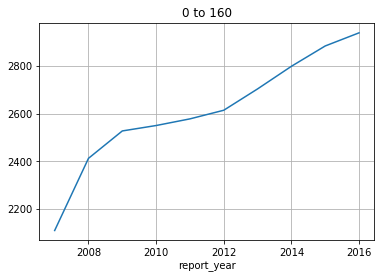

In [43]:

def plot_segment(floor, ceil, ax=None, rev_col=None):
    return revenue_per_capita(floor, ceil, rev_col=rev_col)["rev_per_student"].plot(
        title="%d to %d" % (floor, ceil),
        grid=True,
        ax=ax
    )

plot_segment(0, 160)#, rev_col="Inter_Gov_Rev")

In [44]:
import numpy as np
np.sqrt(4)

2.0

In [45]:
import matplotlib.pyplot as plt

rev_col: None
REV_COL Grant Payments
REV_COL Grant Payments
REV_COL Grant Payments
REV_COL Grant Payments


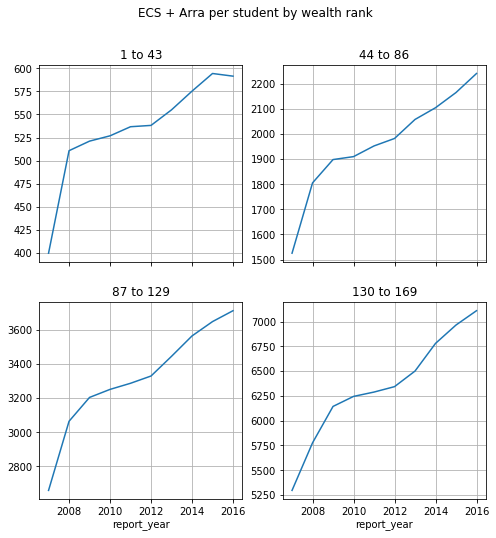

In [46]:
def plot_segments_faceted(bins=4, rev_col=None):
    print "rev_col: %s" % rev_col
    bin_size = round(169 / bins)
    floor = 0
    rows = int(np.sqrt(bins))
    cols = bins / rows
    if (rows * cols < bins): rows += 1
    #print (rows, cols)

    fig, axs = plt.subplots(rows, cols,sharex=True,figsize=(rows * 4, cols * 4))
    
    i = 0
    row = 0
    col = 0
    
    while floor <= 169:
        #print (row, col)
        floor = max(1, floor)
        ceil = min(169, floor + bin_size)
        plot_segment(floor, ceil, axs[row][col], rev_col=rev_col)
        floor += bin_size + 1
        #fig.append(plt.gcf())
        plt.close()
        i += 1
        col += 1
        if col > cols - 1:
            col = 0
            row += 1
    
    return fig
    
fig = plot_segments_faceted(4)
fig.suptitle("ECS + Arra per student by wealth rank")
fig.savefig("figures/grant-payments-per-student.png")
fig

In [47]:
#plot_segments_faceted(9)

rev_col: Inter_Gov_Rev
REV_COL Inter_Gov_Rev
REV_COL Inter_Gov_Rev
REV_COL Inter_Gov_Rev
REV_COL Inter_Gov_Rev


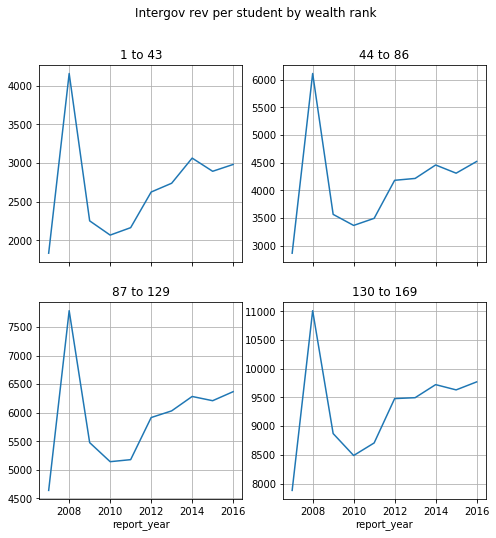

In [48]:
fig = plot_segments_faceted(4, rev_col="Inter_Gov_Rev")
fig.suptitle("Intergov rev per student by wealth rank")
fig.savefig("figures/intergov-rev-per-student.png")
fig